In [6]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from train_valid_split import train_valid_split
from extract_csi import extract_csi
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
class CSIModelConfig:
    def __init__(self, win_len, step, thrshd, downsample):
        self._win_len = win_len
        self._step = step
        self._thrshd = thrshd
        self._labels = ("sitdown", "standup")
        self._downsample = downsample

    def preprocessing(self, raw_folder, save=False):
        numpy_tuple = extract_csi(raw_folder, self._labels, save, self._win_len, self._thrshd, self._step)
        if self._downsample > 1:
            return tuple([v[:, ::self._downsample, ...] if i % 2 == 0 else v for i, v in enumerate(numpy_tuple)])
        return numpy_tuple

cfg = CSIModelConfig(win_len=1000, step=200, thrshd=0.6, downsample=2)
raw_folder = os.path.join(os.getcwd(), 'Dataset')
numpy_tuple = cfg.preprocessing(raw_folder, save=False)

x_sitdown, y_sitdown, x_standup, y_standup = numpy_tuple
x_train, y_train, x_valid, y_valid = train_valid_split(
    (x_sitdown, x_standup),
    train_portion=0.8, 
    seed=379
)

print("Train Data Shape: ", x_train.shape, y_train.shape)
print("Validation Data Shape: ", x_valid.shape, y_valid.shape)

Finished 1.67% for Label sitdown
Finished 3.33% for Label sitdown
Finished 5.00% for Label sitdown
Finished 6.67% for Label sitdown
Finished 8.33% for Label sitdown
Finished 10.00% for Label sitdown
Finished 11.67% for Label sitdown
Finished 13.33% for Label sitdown
Finished 15.00% for Label sitdown
Finished 16.67% for Label sitdown
Finished 18.33% for Label sitdown
Finished 20.00% for Label sitdown
Finished 21.67% for Label sitdown
Finished 23.33% for Label sitdown
Finished 25.00% for Label sitdown
Finished 26.67% for Label sitdown
Finished 28.33% for Label sitdown
Finished 30.00% for Label sitdown
Finished 31.67% for Label sitdown
Finished 33.33% for Label sitdown
Finished 35.00% for Label sitdown
Finished 36.67% for Label sitdown
Finished 38.33% for Label sitdown
Finished 40.00% for Label sitdown
Finished 41.67% for Label sitdown
Finished 43.33% for Label sitdown
Finished 45.00% for Label sitdown
Finished 46.67% for Label sitdown
Finished 48.33% for Label sitdown
Finished 50.00% for

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), np.argmax(y_train, axis=1))

y_pred = rf_model.predict(x_valid.reshape(x_valid.shape[0], -1))
accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.92


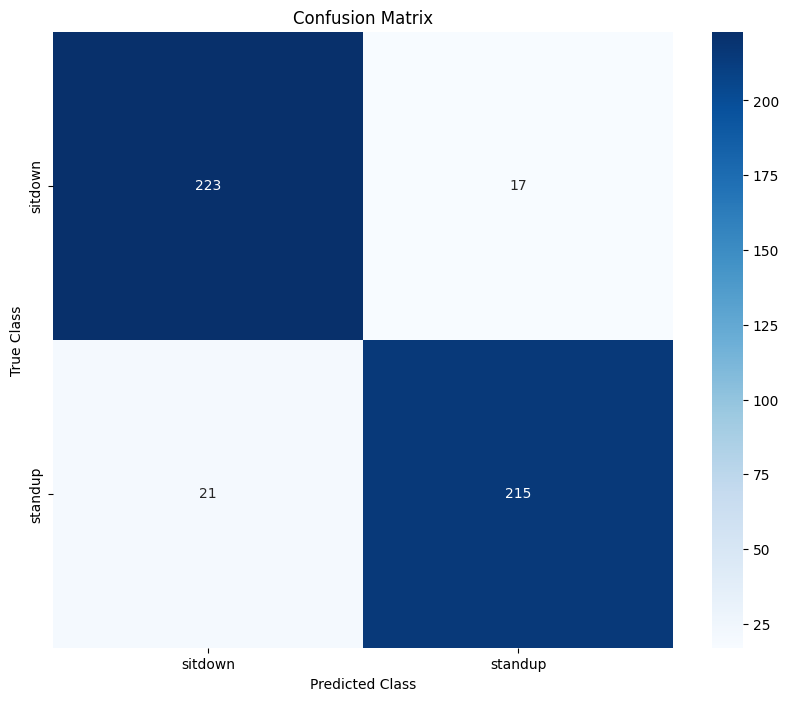

In [12]:
cm = confusion_matrix(np.argmax(y_valid, axis=1), y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cfg._labels, yticklabels=cfg._labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()